## DNI document tampered 

The objetive of this project is to detect de diferences of 2 images of a document base on OpenCV library. A computer vision library that can handle images and undestanding its content. The cv2 module is the most important module in OpenCV, which provides developers with an easy-to-use interface for working with image and video processing functions.

We will determinate the vality of the document using the **following metrics**:
- SSMI (Structural similarity index)
- Boxing / Framing differences into the images
- Black & White differences chart

Source: https://konfuzio.com/en/cv2/

In [22]:
# import the necessary packages
from skimage.metrics import structural_similarity 
import imutils
import cv2
from PIL import Image
import requests

In [23]:
# Local files to handle the images

!mkdir dni_document_tampering
!mkdir dni_document_tampering/image

mkdir: dni_document_tempering: File exists
mkdir: dni_document_tempering/image: File exists


In [24]:
# Open image and display
original = Image.open(requests.get('https://www.h50.es/wp-content/uploads/2020/02/dni3.0_red-696x441.jpg', stream=True).raw) 
tampered = Image.open(requests.get('https://static.elnortedecastilla.es/www/multimedia/201707/10/media/cortadas/Dni3anverso-k16G-U403166256859gE-624x385@El%20Norte.jpg', stream=True).raw)

In [25]:
# The file format of the source file.
print("Original image format : ",original.format) 
print("Tampered image format : ",tampered.format)

# Image size, in pixels. The size is given as a 2-tuple (width, height).
print("Original image size : ",original.size) 
print("Tampered image size : ",tampered.size) 

Original image format :  JPEG
Tampered image format :  JPEG
Original image size :  (696, 441)
Tampered image size :  (594, 385)


In [26]:
# Resize Image
original = original.resize((250, 160))
print(original.size)
original.save('dni_document_tampering/image/original.png')

tampered = tampered.resize((250,160))
print(tampered.size)
tampered.save('dni_document_tamperingimage/tampered.png')

(250, 160)
(250, 160)


In [28]:
# Change image type if required from png to jpg
tampered = Image.open('dni_document_tampering/image/tampered.png')
tampered.save('dni_document_tampering/image/tampered.png') #can be png to jpg

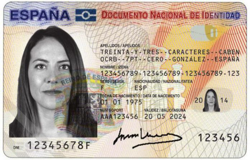

In [29]:
# Display original image
original

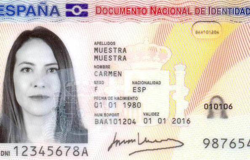

In [30]:
# Display user given image
tampered

In [31]:
# load the two input images
original = cv2.imread('dni_document_tampering/image/original.png')
tampered = cv2.imread('dni_document_tampering/image/tampered.png')

# Uncomment this line if you want to check a full similarity image.
#tampered = cv2.imread('pan_card_tampering/image/original.png')

In [32]:
# Convert the images to grayscale. Is easier to interpretate for the algorithm a single channel image (grayscale) than a three channel image (RGB)
original_gray = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)
tampered_gray = cv2.cvtColor(tampered, cv2.COLOR_BGR2GRAY)

In [33]:
# Compute the Structural Similarity Index (SSIM) between the two images, ensuring that the difference image is returned
(score, diff) = structural_similarity(original_gray, tampered_gray, full=True)
diff = (diff * 255).astype("uint8")
print("SSIM: {}".format(score))

SSIM: 0.11098636782468743


#### SSIM Interpretation

Structural similarity index helps us to determine exactly where in terms of x,y coordinates location, the image differences are. Here, we are trying to find similarities between the original and tampered image. **The lower the SSIM score lower is the similarity**. 

We are getting a very low value, this strongly advise that the image is fake

#### Threshold and contours

The threshold function of computer vision applies an adaptive threshold to the image which is stored in an array. This function transforms the image (in grayscale) into a binary image using a mathematical formula.

Find contours works on binary image and retrive the contours. This contours are a useful tool for shape analysis and recoginition. Grab contours grabs the appropriate value of the contours.

In [34]:
# Calculating threshold and contours 
thresh = cv2.threshold(diff, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

In [35]:
cnts

[array([[[ 89, 159]]], dtype=int32),
 array([[[ 33, 153]],
 
        [[ 36, 153]]], dtype=int32),
 array([[[ 49, 152]],
 
        [[ 48, 153]],
 
        [[ 47, 153]],
 
        [[ 51, 153]],
 
        [[ 50, 153]]], dtype=int32),
 array([[[228, 145]]], dtype=int32),
 array([[[ 81, 144]],
 
        [[ 83, 144]]], dtype=int32),
 array([[[247, 143]]], dtype=int32),
 array([[[ 47, 143]],
 
        [[ 48, 144]],
 
        [[ 48, 145]],
 
        [[ 49, 146]],
 
        [[ 51, 146]],
 
        [[ 52, 147]],
 
        [[ 51, 148]],
 
        [[ 50, 148]],
 
        [[ 49, 149]],
 
        [[ 48, 149]],
 
        [[ 49, 150]],
 
        [[ 50, 150]],
 
        [[ 51, 149]],
 
        [[ 52, 150]],
 
        [[ 53, 149]],
 
        [[ 54, 149]],
 
        [[ 55, 150]],
 
        [[ 55, 151]],
 
        [[ 57, 151]],
 
        [[ 58, 150]],
 
        [[ 59, 150]],
 
        [[ 61, 152]],
 
        [[ 61, 153]],
 
        [[ 62, 153]],
 
        [[ 62, 152]],
 
        [[ 61, 151]],
 
        [[

In [36]:
# loop over the contours to "draw" the rectangules 
for c in cnts:
    # applying contours on image
    (x, y, w, h) = cv2.boundingRect(c)
    cv2.rectangle(original, (x, y), (x + w, y + h), (0, 0, 255), 2)
    cv2.rectangle(tampered, (x, y), (x + w, y + h), (0, 0, 255), 2)

The boxes represent where the images are different. With this appoach we have another way to validate if the images are really different or not. 

Original Format Image


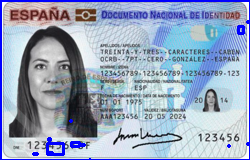

In [14]:
#Diplay original image with contour
print('Original Format Image')
Image.fromarray(original)

Tampered Image


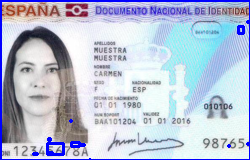

In [15]:
#Diplay tampered image with contour
print('Tampered Image')
Image.fromarray(tampered)

### Threshold and contours interpretation

In this case the quality of the images doesn't allow to identify the difference in the objects within the image. Interpretates that the differences are too big and asume that the whole image is different. 

### Black & White heatmap

We use the diff array and the threshold array to create images in contrast in black and white that allows to see which sectors of the image with highly differences

Different Image


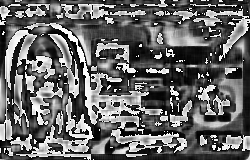

In [16]:
#Diplay difference image with black. W
print('Different Image')
Image.fromarray(diff)

Threshold Image


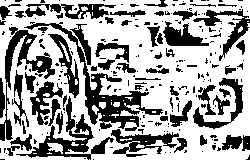

In [17]:
#Display threshold image with white where the white is more intence, it means bigger the difference
print('Threshold Image')
Image.fromarray(thresh)

#### Summary

The **structural similarity (SSIM)** of the images helped us find the differences or similarities in their shapes. Additionally, the threshold and contours based on those thresholds, for the images converted into grayscale binary, also aided us in shape analysis and recognition.

Since our SSIM is approximately 11%, we can conclude that the image provided by the user is likely **fake or tampered** with.

Finally, we visualized the differences and similarities between the images by displaying them with contours, differences, and thresholds.

#### When use this technique?

This approach can be used in different situations where an organization's customer or user need to provide any kind of id in order to get themselves verified. The organization can use this project to find out whether the ID is original or fake. Similarly this can be used for any type of ID or visual documentation that require be verified.